# SARIMAX example
* In this example we will show how to use the ZRXPFormat to read time series data from ZRXP files and how to apply an ARIMA model to interpolate points in the series.

In [1]:
import os
import pkg_resources
import platform
from IPython.core.display import display, HTML
from matplotlib import pyplot
import pandas as pd
import statsmodels.api as sm
from datetime import datetime, date
import pytz
from kisters.water.time_series.file_io import ZRXPFormat

In [2]:
# Version information
data = [['Python', platform.python_version() + ' ' + platform.architecture()[0]],
          ['OS', platform.platform()],
          ['pandas', pkg_resources.require("pandas")[0].version],
          ['matplotlib', pkg_resources.require("matplotlib")[0].version],
          ['statsmodels', pkg_resources.require("statsmodels")[0].version],
          ['kisters.water.time_series', pkg_resources.require("kisters.water.time_series")[0].version]]
html = "<table>"
html += "<tr><th style=\"text-align:left\">Software</th><th style=\"text-align:left\">Version</th></tr>"
for name, version in data:
    html += "<tr><td style=\"text-align:left\">%s</td><td style=\"text-align:left\">%s</td></tr>" % (name, version)
html += "<tr><td style=\"text-align:left\">%s</td></tr>" % (datetime.now().strftime('%c'))
html += "</table>"
display(HTML(html))

In [3]:
zrxp = ZRXPFormat()
reader = zrxp.reader

tslist = list(reader.read("../testdata/K-Greim-SG-cmd-2000-2004.zrx"))
ts = tslist[0]

hourly = ts.read_data_frame().resample("H").mean()

In [4]:
full = pd.DataFrame(hourly["value"])
full = full['2003-01-01 00:00:00':'2003-01-10 00:00:00']
series = pd.concat([full[:'2003-01-03 00:00:00'], full['2003-01-04 00:00:00':]])
#series = full['2003-01-01 00:00:00':'2003-01-10 00:00:00'].copy()
#series['2003-01-03 00:00:00':'2003-01-04 00:00:00'] = None

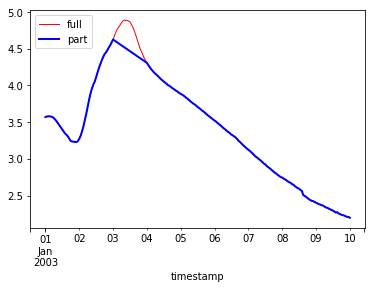

In [5]:
full["value"].plot(label="full", color="red", linewidth=1.0)
series["value"].plot(label="part", color="blue", linewidth=2.0)
pyplot.legend(loc=2)
pyplot.show()

c:\programdata\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                  value   No. Observations:                  194
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 415.235
Date:                Tue, 17 Jul 2018   AIC                           -824.470
Time:                        14:23:41   BIC                           -814.713
Sample:                             0   HQIC                          -820.518
                                - 194                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9245      0.075     12.351      0.000       0.778       1.071
ma.L1         -0.6251      0.085     -7.372      0.000      -0.791      -0.459
sigma2         0.0008   2.75e-05     27.538      0.0

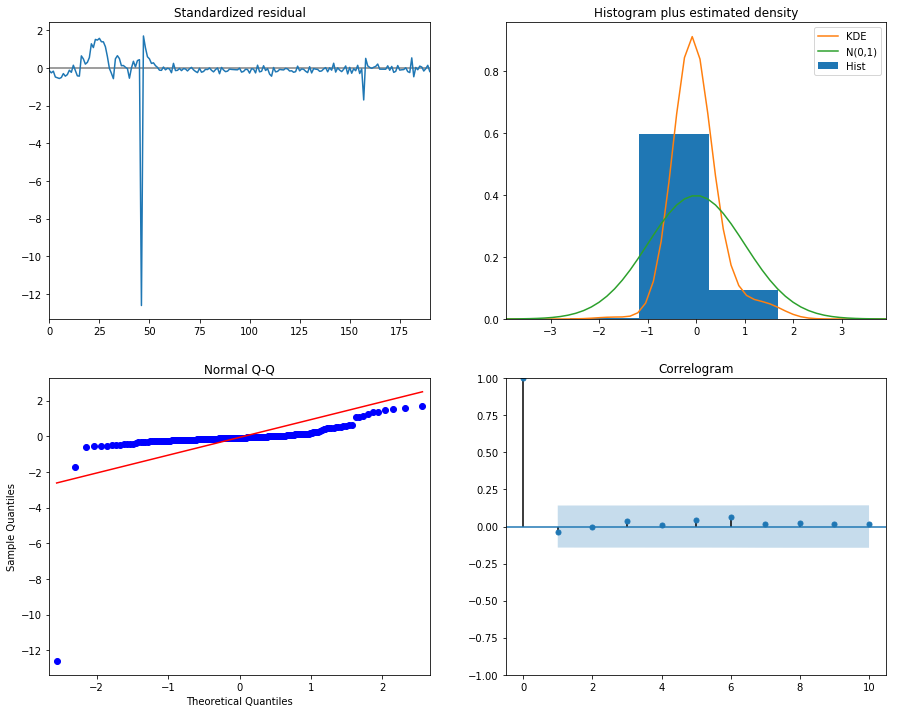

In [6]:
#model = ARIMA(series, order=(1,1,1))
model = sm.tsa.statespace.SARIMAX(series, 
                                  order=(1,1,1),
                                  #seasonal_order=(1, 1, 1, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
model_fit = model.fit()
print(model_fit.summary())

model_fit.plot_diagnostics(figsize=(15, 12))
pyplot.show()

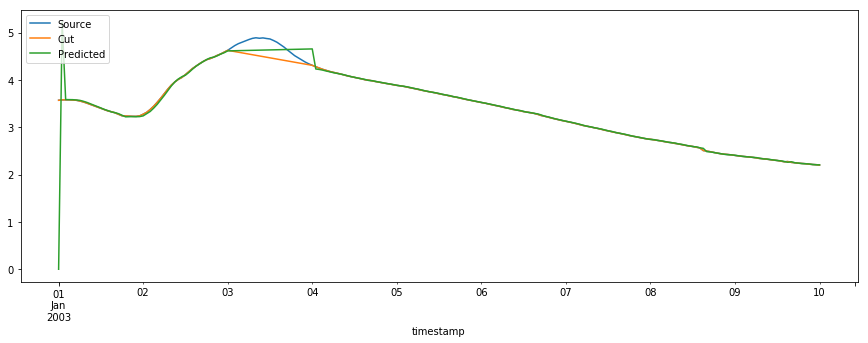

In [7]:
pyplot.figure(figsize=(15, 5))
full["value"].plot(label="Source", figsize=(15, 5))
series["value"].plot(label="Cut", figsize=(15, 5))
series.index
predicted = model_fit.predict(0, -1)
predicted_df = pd.DataFrame(predicted)
predicted_df[0].plot(label="Predicted", figsize=(15, 5))
pyplot.legend(loc=2)
pyplot.show()